# Predicting precipitations in Lake Tahoe

Data can be downloaded from [NOAA](https://www.ncei.noaa.gov/access/search/data-search/global-hourly):
- Location: South Lake Tahoe Airport <br />
- Date Range: 2023/01/01 - 2023/12/31

The [data documentation](https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf) is somewhat scarce.

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NonUploadedData/72584793230.csv', low_memory=False)

In [3]:
df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OD1,OE1,OE2,OE3,RH1,RH2,RH3,WA1,REM,EQD
0,72584793230,2023-01-01T00:22:00,6,38.89838,-119.99617,1907.0,"SOUTH LAKE TAHOE AIRPORT, CA US",FM-16,KTVL,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10712/31/22 16:22:03 SPECI KTVL 010022Z ...,R01 7SKY009R02 7GAS009
1,72584793230,2023-01-01T05:51:00,6,38.89838,-119.99617,1907.0,"SOUTH LAKE TAHOE AIRPORT, CA US",FM-16,KTVL,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10312/31/22 21:51:03 SPECI KTVL 010551Z VRB...,R01 7SKY009R02 7GAS009
2,72584793230,2023-01-01T05:53:00,7,38.89838,-119.99617,1907.0,"SOUTH LAKE TAHOE AIRPORT, CA US",FM-15,KTVL,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET12012/31/22 21:53:03 METAR KTVL 010553Z VRB...,R01 7SKY009R02 7GAS009
3,72584793230,2023-01-01T06:12:00,7,38.89838,-119.99617,1907.0,"SOUTH LAKE TAHOE AIRPORT, CA US",FM-16,KTVL,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10312/31/22 22:12:03 SPECI KTVL 010612Z 000...,R01 7SKY009R02 7GAS009
4,72584793230,2023-01-01T06:27:00,7,38.89838,-119.99617,1907.0,"SOUTH LAKE TAHOE AIRPORT, CA US",FM-16,KTVL,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10512/31/22 22:27:03 SPECI KTVL 010627Z VRB...,R01 7SKY009R02 7GAS009


There are too many columns. Let's see which ones are useful:

In [4]:
df.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1',
       'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4',
       'AI5', 'AI6', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT6', 'AU1', 'AU2',
       'AU3', 'AW1', 'AW2', 'AW3', 'AW4', 'AX1', 'AX2', 'AX3', 'GA1', 'GA2',
       'GA3', 'GD1', 'GD2', 'GD3', 'GE1', 'GF1', 'KA1', 'KA2', 'KB1', 'KB2',
       'KB3', 'KC1', 'KC2', 'KD1', 'KD2', 'KE1', 'KG1', 'KG2', 'MA1', 'MD1',
       'MF1', 'MG1', 'MH1', 'MK1', 'MV1', 'MW1', 'OC1', 'OD1', 'OE1', 'OE2',
       'OE3', 'RH1', 'RH2', 'RH3', 'WA1', 'REM', 'EQD'],
      dtype='object')

make 'DATE' the index

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

We are going to keep:
* WND: wind
* TMP: air temperature
* DEW: dew point temperature
* SLP: atmospheric pressure
* AA1: precipitation
* AT1: weather observation
* RH1: relative humidity

In [6]:
columns_to_keep = [
    'WND', 'TMP', 'DEW', 'SLP', 'AA1', 'AT1', 'RH1']
df = df[columns_to_keep]
df.head()

,WND,TMP,DEW,SLP,AA1,AT1,RH1
DATE,,,,,,,
2023-01-01 00:22:00,"999,9,9,9999,9","+0000,5","-0006,5","99999,9",NaN,NaN,NaN
2023-01-01 05:51:00,"999,9,V,0031,5","-0020,5","-0030,5","99999,9",NaN,NaN,NaN
2023-01-01 05:53:00,"999,9,V,0021,5","-0017,5","-0028,5","10039,5","01,0025,9,5",NaN,NaN
2023-01-01 06:12:00,"999,9,C,0000,5","-0017,5","-0022,5","99999,9","01,0066,3,1",NaN,NaN
2023-01-01 06:27:00,"999,9,V,0015,5","-0017,5","-0028,5","99999,9","01,0109,3,1",NaN,NaN


Now, some of these columns are subdivided into comma-separated subcolumns. <br />
Here are listed the subcolumns that we are keeping:
* WND: subcolumn 3: speed rate. Units: meters per second. Scaling factor of 10.
* TMP: subcolumn 0: air temperature. Units: Deg. Celsius. Scaling factor of 10.
* DEW: subcolumn 0: dew point temperature. Units: Deg. Celsius. Scaling factor of 10. 
* SLP: subcolumn 0: sea level pressure. Units: HectoPa. Scaling factor of 10.
* AA1: subcolumn 1: depth dimension. Units: milimeters. Scaling factor of 10.
* AT1: subcolumn 1: weather type. It is a numeric core denoting the type of daily weather.
* RH1: subcolumn 2: percentage. Units: percentage. No scaling factor.

999 or 9999 means missing data.

In [7]:
df['WND'] = df['WND'].str.split(',', expand=True)[3]
df['WND'] = pd.to_numeric(df['WND'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [8]:
df['TMP'] = df['TMP'].str.split(',', expand=True)[0]
df['TMP'] = pd.to_numeric(df['TMP'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [9]:
df['DEW'] = df['DEW'].str.split(',', expand=True)[0]
df['DEW'] = pd.to_numeric(df['DEW'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [10]:
df['SLP'] = df['SLP'].str.split(',', expand=True)[0]
df['SLP'] = pd.to_numeric(df['SLP'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [11]:
df['AA1'] = df['AA1'].str.split(',', expand=True)[1]
df['AA1'] = pd.to_numeric(df['AA1'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [12]:
df['AT1'] = df['AT1'].str.split(',', expand=True)[1]
df['AT1'] = pd.to_numeric(df['AT1'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [13]:
df['RH1'] = df['RH1'].str.split(',', expand=True)[2]
df['RH1'] = pd.to_numeric(df['RH1'], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [14]:
df.head()

,WND,TMP,DEW,SLP,AA1,AT1,RH1
DATE,,,,,,,
2023-01-01 00:22:00,9999,0,-6,99999,NaN,NaN,NaN
2023-01-01 05:51:00,31,-20,-30,99999,NaN,NaN,NaN
2023-01-01 05:53:00,21,-17,-28,10039,25.0,NaN,NaN
2023-01-01 06:12:00,0,-17,-22,99999,66.0,NaN,NaN
2023-01-01 06:27:00,15,-17,-28,99999,109.0,NaN,NaN


In [15]:
df.max()

WND     9999.0
TMP     9999.0
DEW     9999.0
SLP    99999.0
AA1     9999.0
AT1       22.0
RH1      100.0
dtype: float64

Now we have a combination of NaN and 9999 values.
Let's convert the 9999 values into NaN.

In [16]:
# Convert 9999 to NaN
df.loc[df['WND'] >= 9999, 'WND'] = np.nan
df.loc[df['TMP'] >= 9999, 'TMP'] = np.nan
df.loc[df['DEW'] >= 9999, 'DEW'] = np.nan
df.loc[df['SLP'] >= 99999, 'SLP'] = np.nan
df.loc[df['AA1'] >= 9999, 'AA1'] = np.nan
df.loc[df['RH1'] >= 999, 'RH1'] = np.nan

In [17]:
df.max()

WND      144.0
TMP      333.0
DEW      150.0
SLP    10396.0
AA1     1226.0
AT1       22.0
RH1      100.0
dtype: float64

Remove scaling factor.

In [18]:
df[['WND', 'TMP', 'DEW', 'SLP', 'AA1']] = df[['WND', 'TMP', 'DEW', 'SLP', 'AA1']]/10

In [19]:
df.max()

WND      14.4
TMP      33.3
DEW      15.0
SLP    1039.6
AA1     122.6
AT1      22.0
RH1     100.0
dtype: float64

In [20]:
df.head()

,WND,TMP,DEW,SLP,AA1,AT1,RH1
DATE,,,,,,,
2023-01-01 00:22:00,NaN,0.0,-0.6,NaN,NaN,NaN,NaN
2023-01-01 05:51:00,3.1,-2.0,-3.0,NaN,NaN,NaN,NaN
2023-01-01 05:53:00,2.1,-1.7,-2.8,1003.9,2.5,NaN,NaN
2023-01-01 06:12:00,0.0,-1.7,-2.2,NaN,6.6,NaN,NaN
2023-01-01 06:27:00,1.5,-1.7,-2.8,NaN,10.9,NaN,NaN


Let's plot things.
The NaN values will not be shown in the plots.

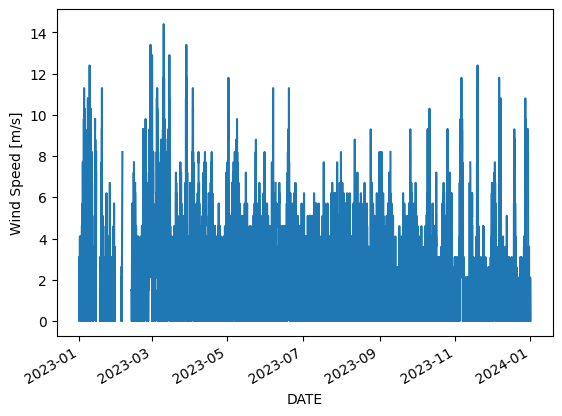

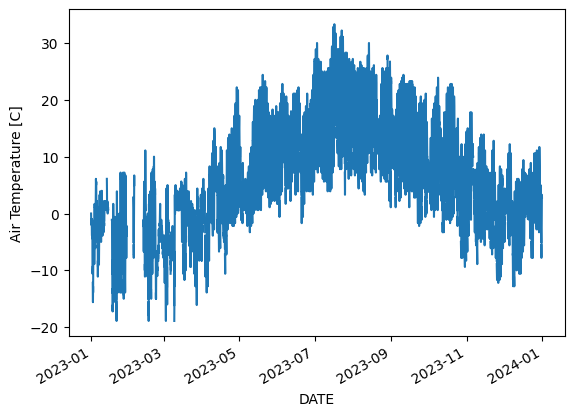

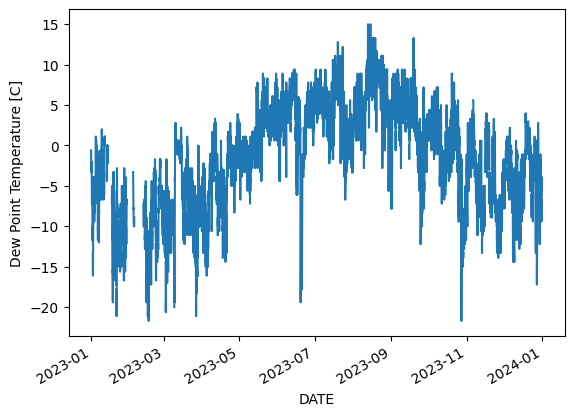

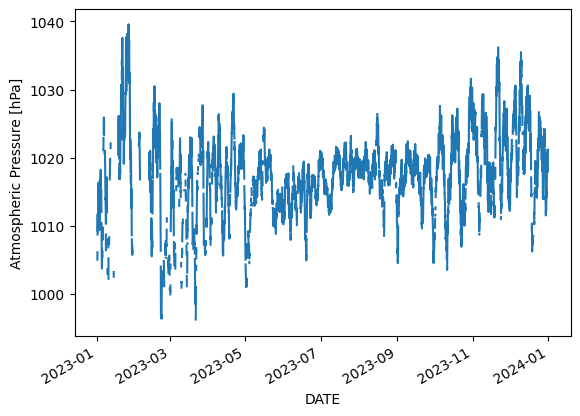

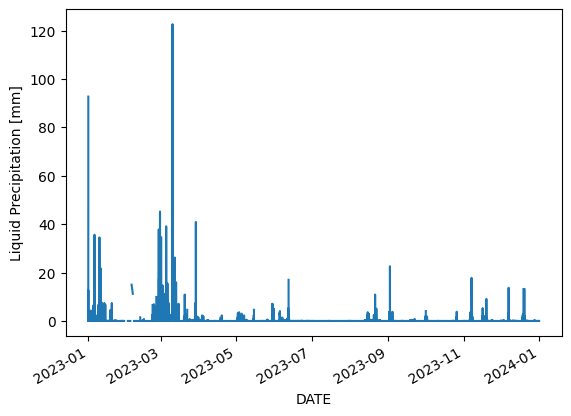

In [25]:
labels = {
    'WND': 'Wind Speed [m/s]',
    'TMP': 'Air Temperature [C]',
    'DEW': 'Dew Point Temperature [C]',
    'SLP': 'Atmospheric Pressure [hPa]',
    'AA1': 'Liquid Precipitation [mm]',
    'AT1': 'Weather Type',
    'RH1': 'Relative Humidity [%]',
}

for column in list(labels.keys())[:-2]:
    plt.figure()
    df[column].plot(ylabel=labels[column])

<AxesSubplot:xlabel='DATE', ylabel='Relative Humidity [%]'>

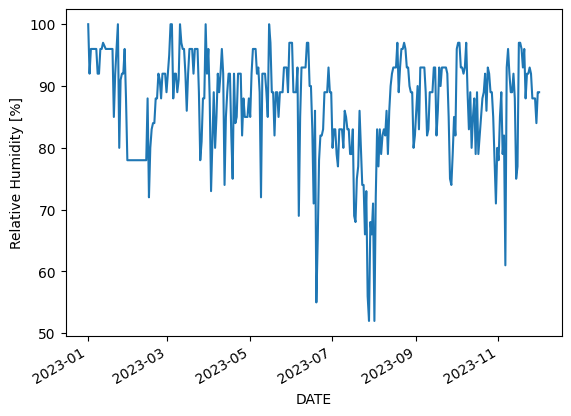

In [26]:
# otherwise it will not show anything
df[(df['RH1'] > 0) & (df['RH1'].notna())]['RH1'].plot(ylabel=labels['RH1'])

Let's add the weather type to the plots of rain depth:

In [27]:
df['AT1'].unique()

array([nan, 16., 18., 13.,  1., 22., 19.,  8.,  3.])

In [28]:
df['AT1_rain'] = 0
df.loc[ df['AT1']==16 , 'AT1_rain'] = 1

In [29]:
df['AT1_snow'] = 0
df.loc[ df['AT1']==18 , 'AT1_snow'] = 1

(19358.0, 19372.0)

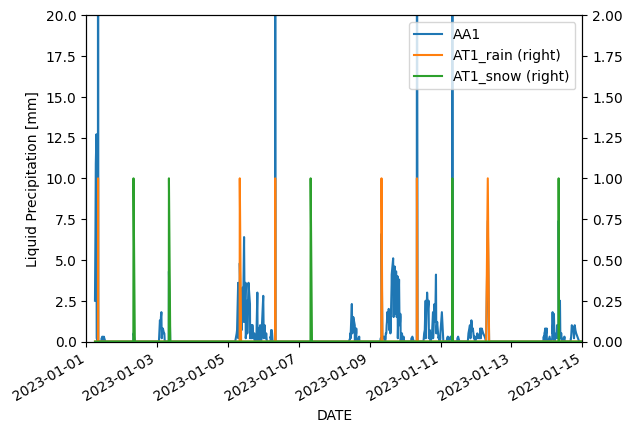

In [30]:
subset_df = df[['AA1', 'AT1_rain', 'AT1_snow']].dropna()
fig, ax = plt.subplots()
subset_df.plot(ax=ax, y='AA1', ylabel=labels['AA1'])
plt.ylim([0, 20])
subset_df.plot(ax=ax, y='AT1_rain', secondary_y=True)
subset_df.plot(ax=ax, y='AT1_snow', secondary_y=True)
plt.ylim([0, 2])
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-15'))

Okay, the conclusions of this figure are that:
- the 'observation_rain' is not reliable. In some days, where there were non zero precipitations, the observation_rain is 0.
- the precipitations account for snow as well. In some days, where there is precipitation, observation_snow is 1, while observatio_rain is 0.
- the subsequent models should not take into account these data.                                                                                      

In [31]:
# drop AT1
# df.drop(columns=['observation_rain'], inplace=True)
df.drop(columns=['AT1', 'AT1_rain', 'AT1_snow'], inplace=True)
df.head()

,WND,TMP,DEW,SLP,AA1,RH1
DATE,,,,,,
2023-01-01 00:22:00,NaN,0.0,-0.6,NaN,NaN,NaN
2023-01-01 05:51:00,3.1,-2.0,-3.0,NaN,NaN,NaN
2023-01-01 05:53:00,2.1,-1.7,-2.8,1003.9,2.5,NaN
2023-01-01 06:12:00,0.0,-1.7,-2.2,NaN,6.6,NaN
2023-01-01 06:27:00,1.5,-1.7,-2.8,NaN,10.9,NaN


Now we need to handle the NaN values

In [32]:
# percentage of na values by column
df.isna().sum()/len(df)*100

WND     5.304276
TMP     4.111842
DEW     4.111842
SLP    31.899671
AA1     9.152961
RH1    97.351974
dtype: float64

In [33]:
df.describe()

,WND,TMP,DEW,SLP,AA1,RH1
count,11515.000000,11660.000000,11660.000000,8281.000000,11047.000000,322.000000
mean,2.531125,4.299794,-1.902058,1017.186499,0.354947,86.618012
std,2.374584,9.338007,6.217582,6.077747,2.765769,11.739649
min,0.000000,-18.900000,-21.700000,996.000000,0.000000,0.000000
25%,0.000000,-2.200000,-6.700000,1013.900000,0.000000,83.000000
50%,2.100000,2.200000,-1.100000,1017.400000,0.000000,89.000000
75%,4.100000,10.600000,2.800000,1020.500000,0.000000,93.000000
max,14.400000,33.300000,15.000000,1039.600000,122.600000,100.000000


In [34]:
# let's fill out SLP and RH1 with the mean value for the column
df['SLP'].fillna((df['SLP'].mean()), inplace=True)
df['RH1'].fillna((df['RH1'].mean()), inplace=True)

df[['SLP', 'RH1']].isna().sum()

SLP    0
RH1    0
dtype: int64

In [35]:
# now TMP and DEW follow a trend, let's fill out the missing values with an interpolation
df['TMP'].interpolate(method='linear', inplace=True)
df['DEW'].interpolate(method='linear', inplace=True)

df[['TMP', 'DEW']].isna().sum()

TMP    0
DEW    0
dtype: int64

In [36]:
# we could either drop all the rows with missing precipitation values
# we could make them 0
# we could replace na values with mean value
# Let's drop them
df.dropna(inplace=True)
df.isna().sum()/len(df)*100

WND    0.0
TMP    0.0
DEW    0.0
SLP    0.0
AA1    0.0
RH1    0.0
dtype: float64

In [37]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # to avoid scientific notation

,WND,TMP,DEW,SLP,AA1,RH1
count,10451.00000,10451.00000,10451.00000,10451.00000,10451.00000,10451.00000
mean,2.56815,4.66982,-1.75562,1017.19518,0.29620,86.61801
std,2.36306,9.24932,6.19806,5.36936,2.41236,0.00000
min,0.00000,-18.90000,-21.70000,996.00000,0.00000,86.61801
25%,0.00000,-2.20000,-6.10000,1015.20000,0.00000,86.61801
50%,2.10000,2.80000,-1.10000,1017.18650,0.00000,86.61801
75%,4.10000,10.60000,2.80000,1019.50000,0.00000,86.61801
max,14.40000,33.30000,15.00000,1039.60000,122.60000,86.61801


The statistics are very similar to what we had before eliminating the NaN values.

## Data pre-processing

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1):
    # n_in = lookback
    # n_out = lookforward
    df = pd.DataFrame(data)
    n_vars = df.shape[1]

    cols, names = [], []
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(n_vars)]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.dropna(inplace=True)
    return agg

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
scaled

array([[0.14583333, 0.32950192, 0.51498638, 0.18119266, 0.02039152,
        0.        ],
       [0.        , 0.32950192, 0.53133515, 0.48592888, 0.05383361,
        0.        ],
       [0.10416667, 0.32950192, 0.51498638, 0.48592888, 0.08890701,
        0.        ],
       ...,
       [0.        , 0.42528736, 0.45504087, 0.50229358, 0.        ,
        0.        ],
       [0.        , 0.42528736, 0.47138965, 0.50688073, 0.        ,
        0.        ],
       [0.        , 0.41570881, 0.4386921 , 0.51605505, 0.        ,
        0.        ]])

In [41]:
n_hours = 2
reframed = series_to_supervised(scaled, n_hours, 1)
reframed

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
2,0.145833,0.329502,0.514986,0.181193,0.020392,0.0,0.000000,0.329502,0.531335,0.485929,0.053834,0.0,0.104167,0.329502,0.514986,0.485929,0.088907,0.0
3,0.000000,0.329502,0.531335,0.485929,0.053834,0.0,0.104167,0.329502,0.514986,0.485929,0.088907,0.0,0.104167,0.329502,0.514986,0.199541,0.103589,0.0
4,0.104167,0.329502,0.514986,0.485929,0.088907,0.0,0.104167,0.329502,0.514986,0.199541,0.103589,0.0,0.104167,0.340996,0.514986,0.485929,0.001631,0.0
5,0.104167,0.329502,0.514986,0.199541,0.103589,0.0,0.104167,0.340996,0.514986,0.485929,0.001631,0.0,0.180556,0.340996,0.514986,0.190367,0.000000,0.0
6,0.104167,0.340996,0.514986,0.485929,0.001631,0.0,0.180556,0.340996,0.514986,0.190367,0.000000,0.0,0.104167,0.340996,0.514986,0.485929,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10446,0.000000,0.319923,0.455041,0.561927,0.000000,0.0,0.000000,0.383142,0.485014,0.541284,0.000000,0.0,0.104167,0.425287,0.438692,0.513761,0.000000,0.0
10447,0.000000,0.383142,0.485014,0.541284,0.000000,0.0,0.104167,0.425287,0.438692,0.513761,0.000000,0.0,0.145833,0.425287,0.471390,0.504587,0.000000,0.0
10448,0.104167,0.425287,0.438692,0.513761,0.000000,0.0,0.145833,0.425287,0.471390,0.504587,0.000000,0.0,0.000000,0.425287,0.455041,0.502294,0.000000,0.0
10449,0.145833,0.425287,0.471390,0.504587,0.000000,0.0,0.000000,0.425287,0.455041,0.502294,0.000000,0.0,0.000000,0.425287,0.471390,0.506881,0.000000,0.0


In [42]:
# split into train and test sets
train_size = int(0.8 * reframed.shape[0])
train = reframed[:train_size]
test = reframed[train_size:]

In [43]:
train.shape, test.shape

((8359, 18), (2090, 18))

In [44]:
train

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
2,0.145833,0.329502,0.514986,0.181193,0.020392,0.0,0.000000,0.329502,0.531335,0.485929,0.053834,0.0,0.104167,0.329502,0.514986,0.485929,0.088907,0.0
3,0.000000,0.329502,0.531335,0.485929,0.053834,0.0,0.104167,0.329502,0.514986,0.485929,0.088907,0.0,0.104167,0.329502,0.514986,0.199541,0.103589,0.0
4,0.104167,0.329502,0.514986,0.485929,0.088907,0.0,0.104167,0.329502,0.514986,0.199541,0.103589,0.0,0.104167,0.340996,0.514986,0.485929,0.001631,0.0
5,0.104167,0.329502,0.514986,0.199541,0.103589,0.0,0.104167,0.340996,0.514986,0.485929,0.001631,0.0,0.180556,0.340996,0.514986,0.190367,0.000000,0.0
6,0.104167,0.340996,0.514986,0.485929,0.001631,0.0,0.180556,0.340996,0.514986,0.190367,0.000000,0.0,0.104167,0.340996,0.514986,0.485929,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,0.000000,0.350575,0.501362,0.444954,0.000000,0.0,0.000000,0.329502,0.485014,0.444954,0.000000,0.0,0.104167,0.319923,0.471390,0.433486,0.000000,0.0
8357,0.000000,0.329502,0.485014,0.444954,0.000000,0.0,0.104167,0.319923,0.471390,0.433486,0.000000,0.0,0.104167,0.319923,0.471390,0.435780,0.000000,0.0
8358,0.104167,0.319923,0.471390,0.433486,0.000000,0.0,0.104167,0.319923,0.471390,0.435780,0.000000,0.0,0.000000,0.308429,0.455041,0.433486,0.000000,0.0
8359,0.104167,0.319923,0.471390,0.435780,0.000000,0.0,0.000000,0.308429,0.455041,0.433486,0.000000,0.0,0.104167,0.308429,0.455041,0.438073,0.000000,0.0


In [47]:
# separate inputs and outputs
n_features = scaled.shape[1]
n_obs = n_hours * n_features
scaled_train_X = train[train.columns[:n_obs]]
# we will try to predict the precipitations
# based on all the available data
scaled_train_y = train[train.columns[-2]]

scaled_train_X.shape, scaled_train_y.shape

((8359, 12), (8359,))

In [73]:
scaled_test_X = test[train.columns[:n_obs]]
scaled_test_y = test[train.columns[-2]]

scaled_test_X.shape, scaled_test_y.shape

((2090, 12), (2090,))

In [51]:
# reshape input to be 3D [samples, look_back, features]
scaled_train_X = scaled_train_X.values.reshape((scaled_train_X.shape[0], n_hours, n_features))
scaled_test_X = scaled_test_X.values.reshape((scaled_test_X.shape[0], n_hours, n_features))

scaled_train_X.shape, scaled_test_X.shape

((8359, 2, 6), (2090, 2, 6))

## Train/Test LSTM model

In [54]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [55]:
# input: 1 time step w/ 6 features
# 1 hidden layer: 50 LSTM neurons
# 1 output layer: predicts pollution
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(scaled_train_X.shape[1], scaled_train_X.shape[2])))
# or
# model.add(LSTM(50, input_shape=(n_hours, n_features)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(scaled_train_X, scaled_train_y, epochs=100, batch_size=30, validation_data=(scaled_test_X, scaled_test_y), verbose=2, shuffle=False)

Epoch 1/100
279/279 - 3s - loss: 0.0063 - val_loss: 0.0012 - 3s/epoch - 11ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0040 - val_loss: 0.0015 - 814ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0039 - val_loss: 0.0014 - 824ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 0.0039 - val_loss: 0.0032 - 829ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 0.0036 - val_loss: 0.0018 - 836ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 0.0035 - val_loss: 0.0015 - 831ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 0.0037 - val_loss: 0.0019 - 805ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 0.0034 - val_loss: 0.0016 - 809ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 0.0035 - val_loss: 0.0036 - 821ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 0.0035 - val_loss: 0.0018 - 818ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 0.0032 - val_loss: 0.0011 - 850ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 0.0031 - val_loss: 0.0044 - 820ms/epoch - 

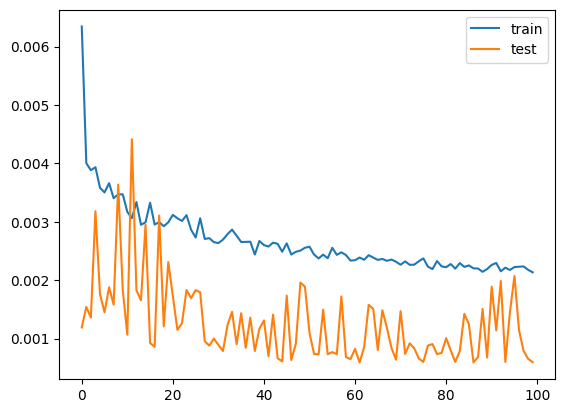

In [57]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Make predictions

In [75]:
from sklearn.metrics import mean_squared_error

In [67]:
# make a prediction
scaled_testYhat = model.predict(scaled_test_X)
inv_test_X = scaled_test_X.reshape((scaled_test_X.shape[0], n_hours*n_features))
scaled_testYhat.shape

66/66 [==============================] - 0s 2ms/step


(2090, 1)

In [68]:
# invert scaling for forecast
testYhat = np.concatenate((inv_test_X[:, -6:-2], scaled_testYhat, inv_test_X[:, -1:]), axis=1)
testYhat = scaler.inverse_transform(testYhat)
testYhat.shape

(2090, 6)

In [74]:
# invert scaling for test_y
scaled_test_y = scaled_test_y.values.reshape(-1, 1)
testY = np.concatenate((inv_test_X[:, -6:-2], scaled_test_y, inv_test_X[:, -1:]), axis=1)
testY = scaler.inverse_transform(testY)
testY.shape

(2090, 6)

In [76]:
# this is our prediction
rain_hat = testYhat[:, -2]
rain = testY[:, -2]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(rain, rain_hat))
print(f'Test RMSE: {rmse}')

Test RMSE: 0.21160024382861944


Text(0.5, 0, 'Date')

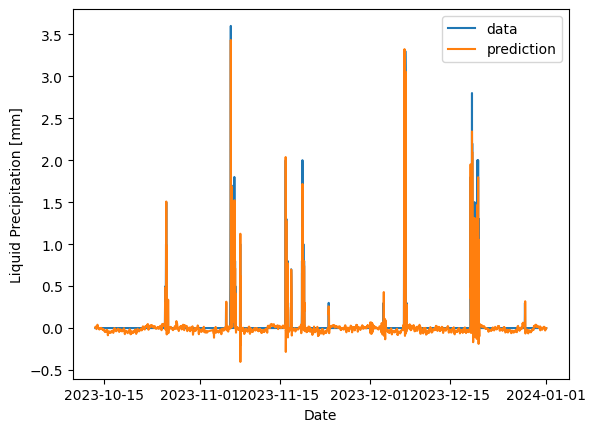

In [90]:
plt.plot(df.index[-test.shape[0]:], rain, label='data')
plt.plot(df.index[-test.shape[0]:], rain_hat, label='prediction')
plt.legend()
plt.ylabel(labels['AA1'])
plt.xlabel('Date')

[]

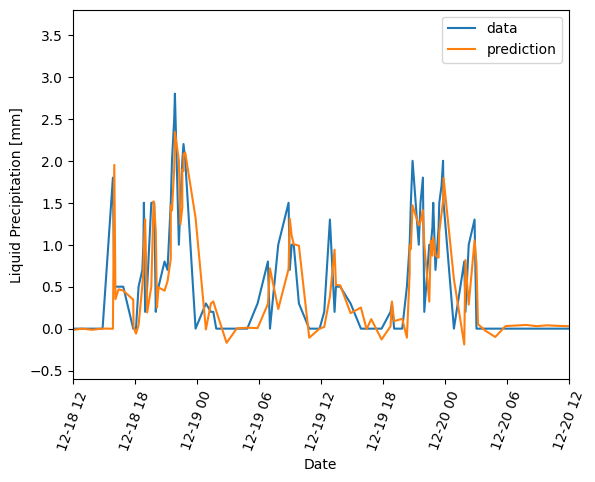

In [95]:
# zoom into
plt.plot(df.index[-test.shape[0]:], rain, label='data')
plt.plot(df.index[-test.shape[0]:], rain_hat, label='prediction')
plt.legend()
plt.ylabel(labels['AA1'])
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.xlim(pd.Timestamp('2023-12-18T12'), pd.Timestamp('2023-12-20T12'))

## Conclusion

The results are a bit wiggly.
I think that is becuase it would need more training data.
The precipitation is kinda hard to predict as there aren't those many non-zero values.
Overall, the results give a low RMSE and the models performs okay.